<a href="https://colab.research.google.com/github/Chandrashekar0123/Lerno-DL-case-study/blob/MonkeyPox-detection/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 2736 images belonging to 2 classes.
Found 684 images belonging to 2 classes.
Found 3420 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 675s 7s/step - accuracy: 0.6003 - loss: 1.0685 - val_accuracy: 0.5439 - val_loss: 0.7381
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 375s 4s/step - accuracy: 0.7116 - loss: 0.5660 - val_accuracy: 0.4810 - val_loss: 0.7491
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 390s 4s/step - accuracy: 0.7609 - loss: 0.4990 - val_accuracy: 0.5541 - val_loss: 1.0132
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 446s 4s/step - accuracy: 0.8152 - loss: 0.4096 - val_accuracy: 0.5424 - val_loss: 1.0003
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 370s 4s/step - accuracy: 0.8713 - loss: 0.3060 - val_accuracy: 0.5263 - val_loss: 1.1701
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 392s 4s/step - accuracy: 0.9010 - loss: 0.2346 - val_accuracy: 0.5424 - val_loss: 1.4134
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 390s 4s/step - accuracy: 0.9320 - loss: 0.1890 - val_accuracy: 0.5249 - val_loss: 1.3357
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 385s 4s/step - accuracy: 0.9469 - loss: 0.1612 - val_accuracy: 0.4912 - val_loss: 1.

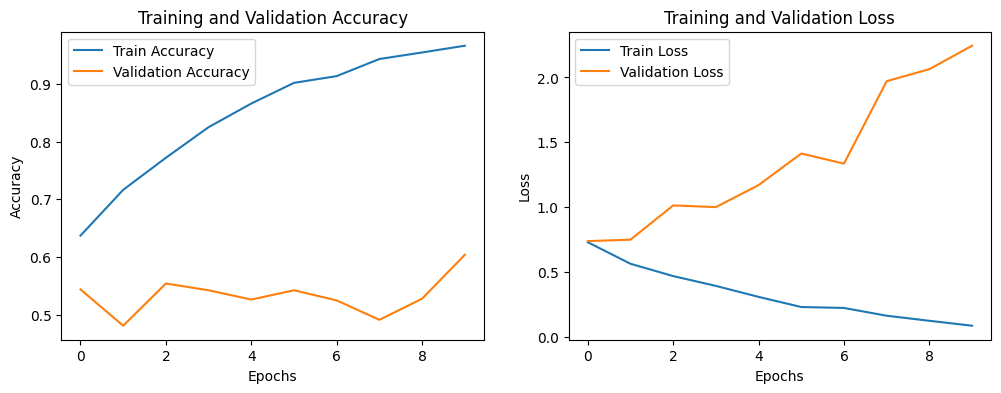

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define the path to the dataset
dataset_path = '/content/drive/MyDrive/DATASET/Augmented Images'

# Create ImageDataGenerator objects for train, validation, and test
datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize the pixel values to [0, 1]
    validation_split=0.2   # Reserve 20% of the data for validation (train/validation split)
)

# Training data generator (80% of the data)
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Adjust size to match your model's input size
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' if you have more than 2 classes
    subset='training',         # This is the training subset
    shuffle=True
)

# Validation data generator (20% of the data)
val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',       # This is the validation subset
    shuffle=False
)

# Test data generator (use the same datagen and a different split)
test_datagen = ImageDataGenerator(
    rescale=1./255
)

# If you have a test folder, you can load test data directly, otherwise split it manually as shown here
test_generator = test_datagen.flow_from_directory(
    dataset_path,              # Reuse the same path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False              # We don't shuffle test data
)

# Build a basic CNN model (you can replace this with any model, such as ResNet, GoogLeNet, etc.)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

# Plot training & validation accuracy and loss
def plot_history(history):
    # Accuracy plot
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the plot function
plot_history(history)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,507,656 (127.82 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,338,438 (85.21 MB)

In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/DATASET/Augmented Images/Monkeypox_augmented"))


['M21_01_13.jpg', 'M21_01_11.jpg', 'M23_01_10.jpg', 'M24_01_13.jpg', 'M20_02_06.jpg', 'M24_01_11.jpg', 'M21_02_10.jpg', 'M24_01_10.jpg', 'M20_01_13.jpg', 'M21_02_11.jpg', 'M21_02_05.jpg', 'M20_02_03.jpg', 'M21_01_12.jpg', 'M20_02_02.jpg', 'M21_02_13.jpg', 'M21_01_00.jpg', 'M23_01_09.jpg', 'M22_01_12.jpg', 'M27_01_04.jpg', 'M25_02_12.jpg', 'M25_01_05.jpg', 'M25_01_01.jpg', 'M24_02_10.jpg', 'M25_01_02.jpg', 'M26_02_03.jpg', 'M25_01_08.jpg', 'M25_02_11.jpg', 'M25_01_09.jpg', 'M25_02_06.jpg', 'M24_02_12.jpg', 'M26_01_11.jpg', 'M26_02_10.jpg', 'M26_02_01.jpg', 'M26_01_02.jpg', 'M26_02_02.jpg', 'M25_02_01.jpg', 'M25_01_06.jpg', 'M27_01_13.jpg', 'M26_01_10.jpg', 'M24_02_06.jpg', 'M28_01_02.jpg', 'M25_01_11.jpg', 'M28_01_01.jpg', 'M27_01_02.jpg', 'M26_01_12.jpg', 'M25_01_12.jpg', 'M25_02_03.jpg', 'M26_02_13.jpg', 'M26_01_05.jpg', 'M27_01_06.jpg', 'M24_02_03.jpg', 'M25_02_09.jpg', 'M26_01_01.jpg', 'M25_01_10.jpg', 'M25_02_13.jpg', 'M25_02_00.jpg', 'M26_02_00.jpg', 'M25_01_00.jpg', 'M26_01_04.jp

In [ ]:

print(os.listdir("/content/drive/MyDrive/DATASET/Augmented Images/Others_augmented"))

['NM45_02_09.jpg', 'NM45_02_11.jpg', 'NM43_05_03.jpg', 'NM45_01_10.jpg', 'NM43_04_12.jpg', 'NM48_01_10.jpg', 'NM47_02_09.jpg', 'NM49_01_07.jpg', 'NM47_01_06.jpg', 'NM46_01_13.jpg', 'NM48_01_04.jpg', 'NM49_01_09.jpg', 'NM47_01_03.jpg', 'NM47_02_04.jpg', 'NM48_01_03.jpg', 'NM46_01_11.jpg', 'NM47_02_11.jpg', 'NM48_01_11.jpg', 'NM48_01_13.jpg', 'NM46_01_02.jpg', 'NM48_01_08.jpg', 'NM49_01_03.jpg', 'NM49_01_08.jpg', 'NM47_01_04.jpg', 'NM49_01_01.jpg', 'NM50_01_02.jpg', 'NM47_02_06.jpg', 'NM46_01_01.jpg', 'NM47_02_02.jpg', 'NM47_02_05.jpg', 'NM48_01_12.jpg', 'NM49_01_04.jpg', 'NM47_01_05.jpg', 'NM47_02_01.jpg', 'NM48_01_06.jpg', 'NM47_01_10.jpg', 'NM46_01_04.jpg', 'NM50_01_00.jpg', 'NM47_01_11.jpg', 'NM50_01_03.jpg', 'NM46_01_09.jpg', 'NM46_01_07.jpg', 'NM47_01_12.jpg', 'NM46_01_12.jpg', 'NM47_02_08.jpg', 'NM49_01_00.jpg', 'NM47_02_10.jpg', 'NM47_01_13.jpg', 'NM48_01_09.jpg', 'NM47_02_03.jpg', 'NM46_01_00.jpg', 'NM49_01_06.jpg', 'NM50_01_01.jpg', 'NM48_01_07.jpg', 'NM46_01_03.jpg', 'NM47_02_

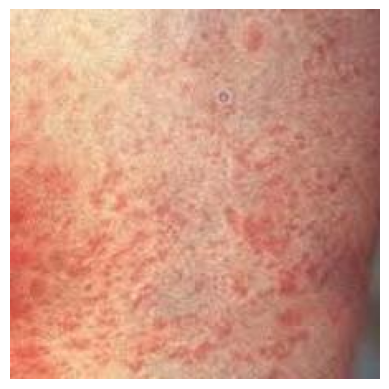

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted class: Other
Actual class: Other
Path parts: ['', 'content', 'drive', 'MyDrive', 'DATASET', 'Augmented Images', 'Others_augmented', 'NM19_01_04.jpg']


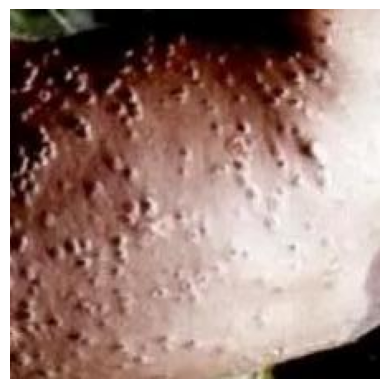

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted class: Monkeypox
Actual class: Monkeypox
Path parts: ['', 'content', 'drive', 'MyDrive', 'DATASET', 'Augmented Images', 'Monkeypox_augmented', 'M51_02_01.jpg']


'Monkeypox'

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

def predict_image(image_path):
    # Load the image with target size
    img = load_img(image_path, target_size=(224, 224))  # Adjust target_size if needed
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

    # Preprocess the image
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)  # Reshape for the model
    x = x / 255.0  # Normalize the image if needed by your model

    # Make the prediction
    prediction = model.predict(x)

    # Get the index of the class with the highest probability
    predicted_class_index = np.argmax(prediction, axis=1)[0]

    # Define class names based on the model's output layer
    class_names = ['Monkeypox', 'Other']

    # Get the name of the predicted class
    predicted_class_name = class_names[predicted_class_index]

    # Determine the actual class based on the folder name
    # Adjust the condition to match your folder structure
    if 'Monkeypox' in image_path:
        actual_class_name = 'Monkeypox'
    else:
        actual_class_name = 'Other'  # Adjust this if there are other classes

    # Print the predicted and actual class names
    print(f"Predicted class: {predicted_class_name}")
    print(f"Actual class: {actual_class_name}")
    print("Path parts:", image_path.split('/'))

    return predicted_class_name

# Test the function with the provided paths
predict_image("/content/drive/MyDrive/DATASET/Augmented Images/Others_augmented/NM19_01_04.jpg")
predict_image("/content/drive/MyDrive/DATASET/Augmented Images/Monkeypox_augmented/M51_02_01.jpg")


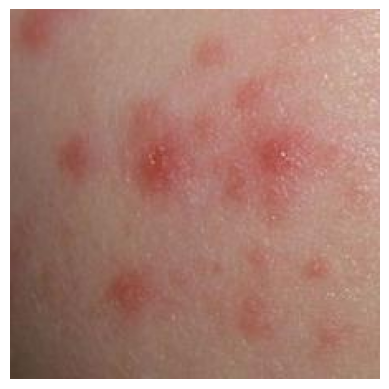

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted class: Other
Actual class: Other
Path parts: ['', 'content', 'drive', 'MyDrive', 'DATASET', 'Augmented Images', 'Others_augmented', 'NM45_02.jpg']


'Other'

In [ ]:
predict_image("/content/drive/MyDrive/DATASET/Augmented Images/Others_augmented/NM45_02.jpg")

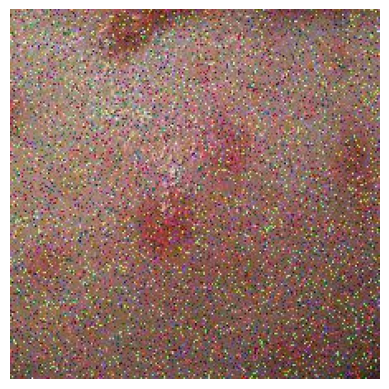

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted class: Other
Actual class: Other
Path parts: ['', 'content', 'drive', 'MyDrive', 'DATASET', 'Augmented Images', 'Others_augmented', 'NM45_01_10.jpg']


'Other'

In [ ]:
predict_image("/content/drive/MyDrive/DATASET/Augmented Images/Others_augmented/NM45_01_10.jpg")

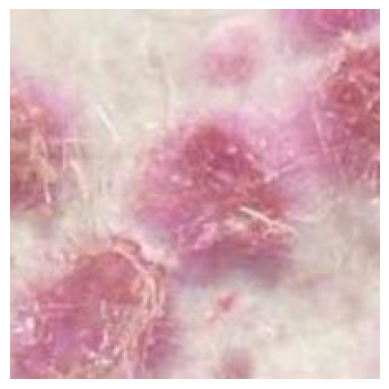

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Predicted class: Other
Actual class: Monkeypox
Path parts: ['', 'content', 'drive', 'MyDrive', 'DATASET', 'Augmented Images', 'Monkeypox_augmented', 'M21_01_13.jpg']


'Other'

In [ ]:

predict_image("/content/drive/MyDrive/DATASET/Augmented Images/Monkeypox_augmented/M21_01_13.jpg")

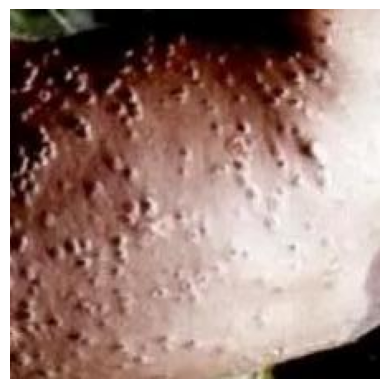

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted class: Monkeypox
Actual class: Monkeypox
Path parts: ['', 'content', 'drive', 'MyDrive', 'DATASET', 'Augmented Images', 'Monkeypox_augmented', 'M51_02_01.jpg']


'Monkeypox'

In [ ]:

predict_image("/content/drive/MyDrive/DATASET/Augmented Images/Monkeypox_augmented/M51_02_01.jpg")

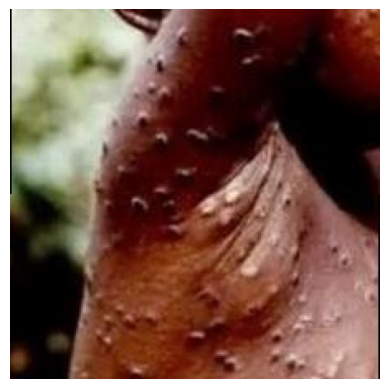

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted class: Monkeypox
Actual class: Monkeypox
Path parts: ['', 'content', 'drive', 'MyDrive', 'DATASET', 'Augmented Images', 'Monkeypox_augmented', 'M50_02_05.jpg']


'Monkeypox'

In [ ]:
predict_image("/content/drive/MyDrive/DATASET/Augmented Images/Monkeypox_augmented/M50_02_05.jpg")

Accuracy: 80.00%


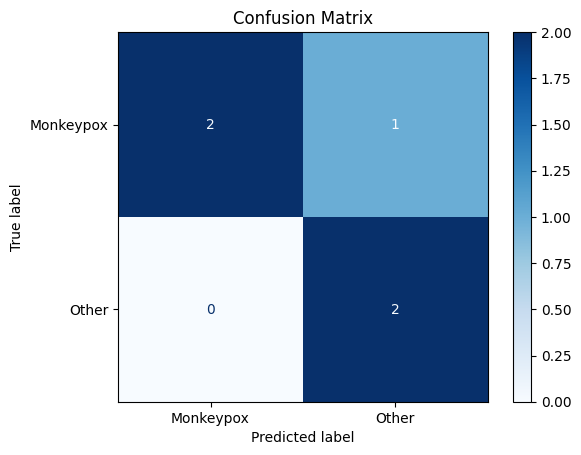

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Sample true labels and predicted labels
# Replace these with your actual data
true_labels = ['Monkeypox', 'Other', 'Monkeypox', 'Other', 'Monkeypox']  # Example true labels
predicted_labels = ['Monkeypox', 'Other', 'Other', 'Other', 'Monkeypox']  # Example predicted labels

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=['Monkeypox', 'Other'])

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Monkeypox', 'Other'])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

# Sample true labels and predicted labels
# Replace these with your actual data
true_labels = ['Monkeypox', 'Other', 'Monkeypox', 'Other', 'Monkeypox']  # Example true labels
predicted_labels = ['Monkeypox', 'Other', 'Other', 'Other', 'Monkeypox']  # Example predicted labels

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=['Monkeypox', 'Other'])

# Display confusion matrix
print("Confusion Matrix:")
print(cm)


Accuracy: 80.00%
Confusion Matrix:
[[2 1]
 [0 2]]
